# Audio Segmentation

In [1]:
import soundfile as sf
import librosa as lb
import math
from scipy.signal.windows import hann, hamming
import numpy as np
from matplotlib import pyplot as plt

### Reading audio file

In [2]:
signal, fs = sf.read('/Users/rajeshr/Desktop/voice_HDP.wav')
print(signal, fs)

[ 0.00164795  0.00247192  0.0065918  ... -0.00164795 -0.0065918
 -0.00576782] 48000


### Getting overlapped frames

In [3]:
''' 
This functions splits into multiples frames. 
Inputs are: 
1. Input signal, fs,
2. Window (can use scipy.signal.windows to import hann, hamming or rect) Winsize(nw) is needed nw = 0.03*fs [Typical val], 
3. Overlap factor (usually 0.5).
Returns: frames.
'''

sym = False
window = hamming(math.floor(0.03*fs), sym)

def split_frames(signal, window, overlap=0.5):
    
    n = len(signal) #length of input
    nw = len(window) #window size
    step = math.floor(nw*(1-overlap)) 
    
    nf = math.floor((n-nw)/step)+1 #number of frames
    
    frames = np.zeros((nf, nw))
    
    for i in range(nf):
        offset = i*step        
        frames[i, :] = window*signal[offset: nw+offset]
    
    return frames

In [4]:
frames = split_frames(signal, window, 0.5)
print(len(frames), frames)

1171 [[ 1.31835938e-04  1.97764730e-04  5.27459208e-04 ...  2.37421588e-03
  -5.93391609e-04 -2.90054938e-03]
 [ 1.97753906e-04 -1.31843154e-04  6.59324010e-05 ... -1.31900882e-04
   0.00000000e+00 -6.59215768e-05]
 [-3.36181641e-03 -1.91172573e-03  6.59324010e-04 ... -4.61653087e-04
  -5.93391609e-04 -4.61451038e-04]
 ...
 [-1.31835938e-04 -1.31843154e-04 -1.31864802e-04 ...  6.59504410e-05
   6.59324010e-05  6.59215768e-05]
 [-1.97753906e-04 -1.97764730e-04 -1.97797203e-04 ...  6.59504410e-05
   0.00000000e+00  6.59215768e-05]
 [ 6.59179688e-05  0.00000000e+00  6.59324010e-05 ... -1.31900882e-04
  -1.97797203e-04 -2.63686307e-04]]


### Energy Computations

In [5]:
energy = []

for frame in frames:
    enrg = 0
    for i in frame:
        enrg = enrg + abs(i*i)
    energy.append(enrg)
    
print(len(energy))

1171


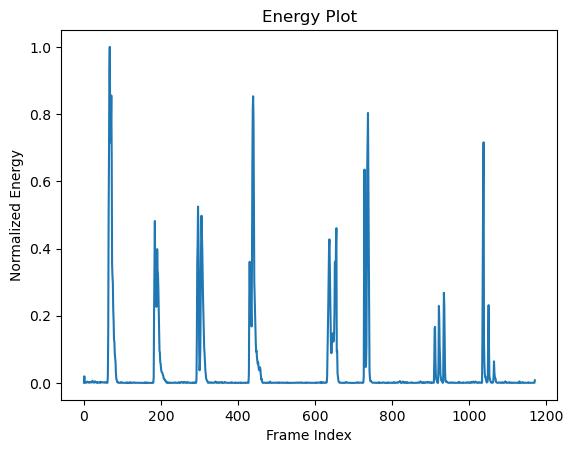

In [6]:
max_energy = max(energy)
x = np.arange(len(energy))
plt.plot(x, energy/max_energy)
plt.xlabel('Frame Index')
plt.ylabel('Normalized Energy')
plt.title('Energy Plot')
plt.show()

### Based on energy, extracting frames

In [7]:
threshold = 0.1
segmented_frame_no = []
for i in range(len(energy)):
    if energy[i] > threshold:
        segmented_frame_no.append(i)
    
del segmented_frame_no[0]
print(len(segmented_frame_no), segmented_frame_no)

206 [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 909, 910, 911, 912, 913, 914, 915, 920, 921, 922, 923, 924, 925, 926, 927, 933, 934, 935, 936, 937, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1063, 1

In [8]:
error = 3
grouped_frame_no = []
temp = []

for i in range(len(segmented_frame_no)-1):
    if segmented_frame_no[i+1] - segmented_frame_no[i] <= error:
        temp.append(segmented_frame_no[i])
    else:
        grouped_frame_no.append(temp)
        temp = []

if temp != 0:
    grouped_frame_no.append(temp)

print(len(grouped_frame_no), grouped_frame_no)

13 [[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], [181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209], [292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317], [428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460], [631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659], [726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741], [909, 910, 911, 912, 913, 914], [920, 921, 922, 923, 924, 925, 926], [933, 934, 935, 936], [1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042], [1048, 1049, 1050, 1051, 1052, 1053], [1063, 1064, 1065, 1066, 1067], []]


In [13]:
segmented_frames = []
for i in range(len(grouped_frame_no)):
    if grouped_frame_no[i]:
        t = grouped_frame_no[i]
        #print(t)
        last = t[-1]
        #print(last+1)
        grouped_frame_no[i].append(last+1)
        segmented_frames.append([frames[k] for k in grouped_frame_no[i]])

### getting back original audio by overlap add frames

In [14]:
''' 
This functions adds back the multiples frames into single frame. 
Inputs are: 
1. frames,
2. n len of the input signal, obtained while reading input, if not available pass -1
3. Overlap factor (usually 0.5).
Returns: frame.
'''
def merge_frames(frames, n, overlap=0.5):
    
    nf, nw = frames.shape
    step = math.floor(nw*(1-overlap))   
    if n == -1:
        n = (nf-1) * step + nw
    frame = np.zeros(n)

    for i in range(nf):
        offset = i * step
        frame[offset : nw + offset] += frames[i, :]
    
    return frame

In [15]:
segemented_file = []
for frames in segmented_frames:
    frames = np.array(frames)
    segemented_file.append(merge_frames(frames, -1, 0.5))
    
print(segemented_file)

[array([-0.00019775, -0.00019776, -0.00013186, ...,  0.00092331,
        0.00092305,  0.0009229 ]), array([0.00039551, 0.00039553, 0.00039559, ..., 0.0001319 , 0.00013186,
       0.00013184]), array([0.00019775, 0.00019776, 0.0001978 , ..., 0.0002638 , 0.00026373,
       0.00026369]), array([-6.59179688e-05, -6.59215768e-05, -6.59324010e-05, ...,
       -1.31900882e-04, -1.31864802e-04, -1.31843154e-04]), array([0.00052734, 0.00052737, 0.00052746, ..., 0.0002638 , 0.00026373,
       0.00026369]), array([-0.00105469, -0.00112067, -0.00112085, ..., -0.00059355,
       -0.00052746, -0.00052737]), array([ 6.59179688e-05,  6.59215768e-05,  6.59324010e-05, ...,
        0.00000000e+00, -6.59324010e-05, -6.59215768e-05]), array([-6.59179688e-05, -6.59215768e-05, -6.59324010e-05, ...,
       -6.59504410e-05, -1.31864802e-04, -1.31843154e-04]), array([-0.00019775, -0.00019776, -0.0001978 , ...,  0.00079141,
        0.00079119,  0.00072514]), array([-0.00046143, -0.00046145, -0.00046153, ...,  0.

### Writing the segmented Audio

In [16]:
i = 1
for segment in segemented_file:
    sf.write('/Users/rajeshr/Desktop/AudioSegment/segmented_'+str(i)+'.wav', segment, fs)
    i = i+1